In [1]:
# Importing libraries and reading the data in dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_users = pd.read_csv(r'./Data/train_users_2.csv')
test_users = pd.read_csv(r'./Data/test_users.csv')

In [2]:
#Concating the datasets
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [3]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')


In [5]:
df_1=users.groupby('language').count()
df_1.to_csv('./Output/Analysis5_1.csv')

In [6]:
df_2=pd.read_csv(r'./Output/Analysis5_1.csv')
df_2.dtypes

language                   object
affiliate_channel           int64
affiliate_provider          int64
age                         int64
country_destination         int64
date_account_created        int64
date_first_booking          int64
first_affiliate_tracked     int64
first_browser               int64
first_device_type           int64
gender                      int64
id                          int64
signup_app                  int64
signup_flow                 int64
signup_method               int64
timestamp_first_active      int64
date_first_active           int64
dtype: object

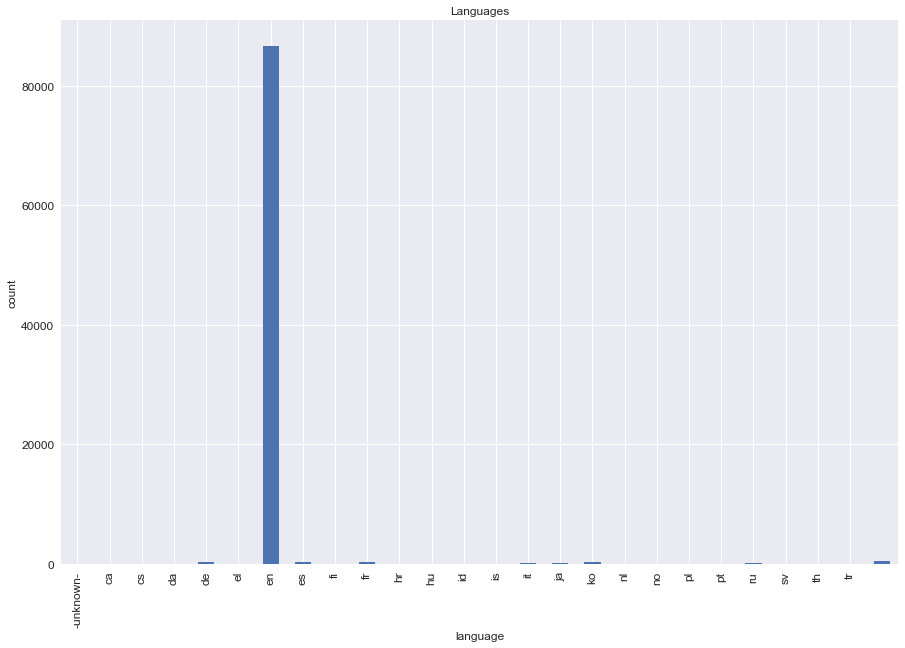

In [7]:
# Seeing the most spoken language
#df_1['language'].plot.bar()
ax = df_2[['language','date_first_booking']].plot(kind='bar', title ="Languages", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("language", fontsize=12)
language=df_2['language']
plt.xticks((0,1,2,3,4,5,6,7,8,9, 10,11,12, 13,14, 15,16,17,18,19,20,21,22,23, 24),language)
ax.set_ylabel("count", fontsize=12)
plt.show()

In [12]:
df=users.groupby(['language','country_destination']).agg(['count']).astype(int)

In [13]:
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14]], axis=1, inplace=True)

In [16]:
df.to_csv('./Output/Analysis_5')